In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Classifiers import *
%matplotlib inline

In [2]:
base_learners_collection = [2,3,3,2]
true_labels = np.random.randint(0,100,10000)
variance= {'0': [0.2,0.5,0.8], '1': [2, 5, 8], '2': [20, 50, 80], '3': [100, 110, 120]}

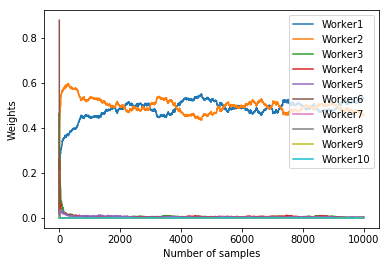

In [3]:
learning_rate = 0.01
predictor_base_with_weights = Base_with_weights(base_learners_collection = base_learners_collection, variance_dict = variance)
predictor_base_with_weights.training(true_labels, learning_rate)
predictor_base_with_weights.plot_weights_curve()

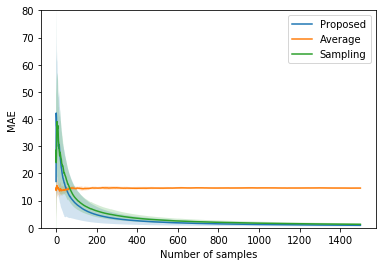

In [7]:
MAE_predictor_base_with_weights = []
MAE_predictor_base_with_average = []
MAE_predictor_base_with_sampling = []
learning_rate = 0.01
num_experiments = 10

for t in range(num_experiments):
    predictor_base_with_weights = Base_with_weights(base_learners_collection = base_learners_collection, 
                                                        variance_dict = variance)
    predictor_base_with_weights.training(true_labels, learning_rate)
    MAE_predictor_base_with_weights.append(np.array(predictor_base_with_weights.MAE_collection))
    
    predictor_base_with_average = Base_with_average(base_learners_collection = base_learners_collection, variance_dict = variance)
    predictor_base_with_average.training(true_labels, learning_rate)
    MAE_predictor_base_with_average.append(np.array(predictor_base_with_average.MAE_collection))
    
    predictor_base_with_sampling = Base_with_sampling(base_learners_collection = base_learners_collection, variance_dict = variance)
    predictor_base_with_sampling.training(true_labels, learning_rate)
    MAE_predictor_base_with_sampling.append(np.array(predictor_base_with_sampling.MAE_collection))
    
result_predictor_base_with_weights = MAE_predictor_base_with_weights[0]
result_predictor_base_with_average = MAE_predictor_base_with_average[0]
result_predictor_base_with_sampling = MAE_predictor_base_with_sampling[0]

for i in range(len(MAE_predictor_base_with_weights)-1):
    result_predictor_base_with_weights = np.vstack((result_predictor_base_with_weights, MAE_predictor_base_with_weights[i+1]))
    result_predictor_base_with_average = np.vstack((result_predictor_base_with_average, MAE_predictor_base_with_average[i+1]))
    result_predictor_base_with_sampling = np.vstack((result_predictor_base_with_sampling, MAE_predictor_base_with_sampling[i+1]))
    
iterations_displayed = 1500
x = range(iterations_displayed)

y = result_predictor_base_with_weights.mean(axis=0)[:iterations_displayed]
std = result_predictor_base_with_weights.std(axis=0)[:iterations_displayed]
plt.plot(x,y, label = "Proposed")
plt.fill_between(x, y - std, y + std,alpha=0.2)

y = result_predictor_base_with_average.mean(axis=0)[:iterations_displayed]
std = result_predictor_base_with_average.std(axis=0)[:iterations_displayed]
plt.plot(x,y, label = "Average")
plt.fill_between(x, y - std, y + std, alpha=0.2)

y = result_predictor_base_with_sampling.mean(axis=0)[:iterations_displayed]
std = result_predictor_base_with_sampling.std(axis=0)[:iterations_displayed]
plt.plot(x,y, label = u"Sampling")
plt.fill_between(x, y - std, y + std, alpha=0.2)

plt.ylim(0,80)
plt.xlabel("Number of samples")
plt.ylabel("MAE")
plt.legend()

# Realworld Datasets

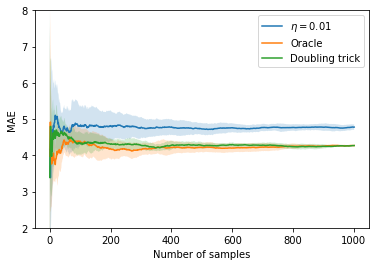

In [14]:
dataset = pd.read_excel("age data.xlsx")
dataset = dataset.drop(['File_name'], axis = 1)
true_labels = np.array(dataset["truth lable"])
X = np.array(dataset.drop(['truth lable'], axis = 1))
num = 1
X_extend = X.repeat(num, axis = 0)
y_extend = true_labels.repeat(num)

MAE_constant = []
MAE_oracle = []
MAE_doubling = []
learning_rate_constant = 0.01
learning_rate_oracle = 1.0/8624*np.sqrt(2.0*np.log(10)/10000)
learning_rate_doubling = learning_rate_oracle
num_experiments = 10

for t in range(num_experiments):
    X_extend, y_extend = shuffle(X_extend, y_extend)
    predictor_constant = Base_with_stepsize()
    predictor_constant.training(X_extend, y_extend, learning_rate_constant, "constant")
    MAE_constant.append(np.array(predictor_constant.MAE_collection))
    X_extend, y_extend = shuffle(X_extend, y_extend)
    predictor_oracle = Base_with_stepsize()
    predictor_oracle.training(X_extend, y_extend, learning_rate_doubling, "oracle")
    MAE_oracle.append(np.array(predictor_oracle.MAE_collection))
    X_extend, y_extend = shuffle(X_extend, y_extend)
    predictor_doubling = Base_with_stepsize()
    predictor_doubling.training(X_extend, y_extend, learning_rate_doubling, "doubling")
    MAE_doubling.append(np.array(predictor_doubling.MAE_collection))
    
result_constant = MAE_constant[0]
result_oracle = MAE_oracle[0]
result_doubling  = MAE_doubling [0]
for i in range(len(MAE_constant)-1):
    result_constant = np.vstack((result_constant, MAE_constant[i+1]))
    result_oracle = np.vstack((result_oracle, MAE_oracle[i+1]))
    result_doubling = np.vstack((result_doubling, MAE_doubling[i+1]))
    
iterations_displayed = 1002
x = range(iterations_displayed)

y = result_constant.mean(axis=0)[:iterations_displayed]
std = result_constant.std(axis=0)[:iterations_displayed]
plt.plot(x,y, label = "$\eta=0.01$")
plt.fill_between(x, y - std, y + std,alpha=0.2)

y = result_oracle.mean(axis=0)[:iterations_displayed]
std = result_oracle.std(axis=0)[:iterations_displayed]
plt.plot(x,y, label = u"Oracle")
plt.fill_between(x, y - std, y + std, alpha=0.2)

y = result_doubling.mean(axis=0)[:iterations_displayed]
std = result_doubling.std(axis=0)[:iterations_displayed]
plt.plot(x,y, label = u"Doubling trick")
plt.fill_between(x, y - std, y + std, alpha=0.2)

plt.xlabel("Number of samples")
plt.ylabel("MAE")
plt.ylim(2,8)
plt.legend()

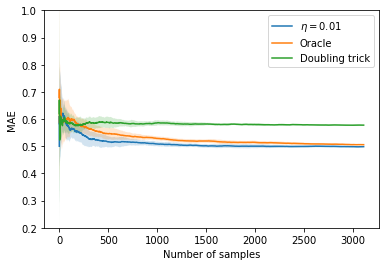

In [56]:
df_1 = pd.read_csv("train.csv")
df_2 = pd.read_csv("validation.csv")
df_3 = pd.read_csv("test.csv")
dataset = pd.concat([df_1,df_2,df_3])
X = np.array(dataset[['A1','A2','A3','A4','A5']])
y = np.array(dataset[['True_Label']]).flatten()
num = 1
X_extend = X.repeat(num, axis = 0)
y_extend = y.repeat(num)

iterations_displayed = 3112
learning_rate_constant = 0.01
learning_rate_oracle = 1 / 9.0 *np.sqrt(2.0*np.log(5)/iterations_displayed)
learning_rate_doubling = learning_rate_oracle
num_experiments = 10
MAE_constant = []
MAE_oracle = []
MAE_doubling = []

for t in range(num_experiments):
    X_extend, y_extend = shuffle(X_extend, y_extend)
    predictor_constant = Base_with_stepsize()
    predictor_constant.training(X_extend, y_extend, learning_rate_constant, "constant")
    MAE_constant.append(np.array(predictor_constant.MAE_collection))
    X_extend, y_extend = shuffle(X_extend, y_extend)
    predictor_oracle = Base_with_stepsize()
    predictor_oracle.training(X_extend, y_extend, learning_rate_oracle, "oracle")
    MAE_oracle.append(np.array(predictor_oracle.MAE_collection))
    X_extend, y_extend = shuffle(X_extend, y_extend)
    predictor_doubling = Base_with_stepsize()
    predictor_doubling.training(X_extend, y_extend, learning_rate_doubling, "doubling")
    MAE_doubling.append(np.array(predictor_doubling.MAE_collection))
result_constant = MAE_constant[0]
result_oracle = MAE_oracle[0]
result_doubling  = MAE_doubling [0]
for i in range(len(MAE_constant)-1):
    result_constant = np.vstack((result_constant, MAE_constant[i+1]))
    result_oracle = np.vstack((result_oracle, MAE_oracle[i+1]))
    result_doubling = np.vstack((result_doubling, MAE_doubling[i+1]))

x = range(iterations_displayed)

y = result_constant.mean(axis=0)[:iterations_displayed]
std = result_constant.std(axis=0)[:iterations_displayed]
plt.plot(x,y, label = "$\eta=0.01$")
plt.fill_between(x, y - std, y + std,alpha=0.2)

y = result_oracle.mean(axis=0)[:iterations_displayed]
std = result_oracle.std(axis=0)[:iterations_displayed]
plt.plot(x,y, label = "Oracle")
plt.fill_between(x, y - std, y + std, alpha=0.2)

y = result_doubling.mean(axis=0)[:iterations_displayed]
std = result_doubling.std(axis=0)[:iterations_displayed]
plt.plot(x,y, label = "Doubling trick")
plt.fill_between(x, y - std, y + std, alpha=0.2)

plt.xlabel("Number of samples")
plt.ylabel("MAE")
plt.ylim(0.2,1)
plt.legend()

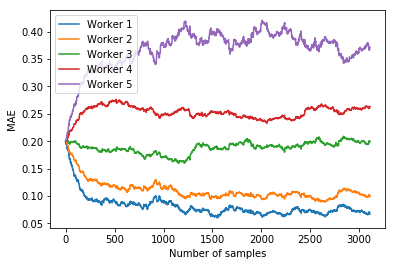

In [57]:
predictor_constant.plot_weights_curve()

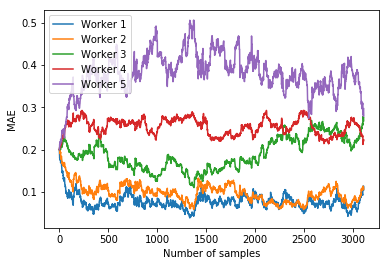

In [54]:
predictor_oracle.plot_weights_curve()

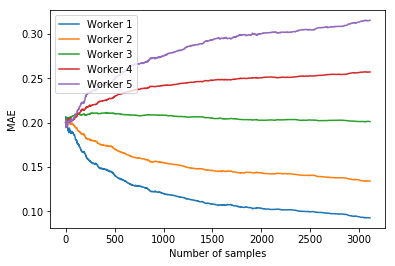

In [55]:
predictor_doubling.plot_weights_curve()